In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
import shap

# <span style="color:violet">**Exploratory Data Analysis I**</span>

In [2]:
sns.set_theme(style="darkgrid")

In [3]:
df=pd.read_csv("obesity.csv")

In [4]:
df.head()

,gend,age,height,weight,famhist,calH,veg,meals,snacks,smoke,water,calM,phys,tech,alc,trans,obese
0,1,21,1.62,64.0,1,0,1,3,1,0,2,0,0,1,0,4,2
1,1,21,1.52,56.0,1,0,2,3,1,1,3,1,3,0,1,4,2
2,0,23,1.80,77.0,1,0,1,3,1,0,2,0,2,1,2,4,2
3,0,27,1.80,87.0,0,0,2,3,1,0,2,0,2,0,2,5,3
4,0,22,1.78,89.8,0,0,1,1,1,0,2,0,0,0,1,4,4


In [5]:
# Rename columns
# ds.columns=["gender", "age", "height"]

In [6]:
len(df)

498

In [7]:
ydist=df['obese'].value_counts(dropna=True)
print(ydist)

obese
2    287
3     58
4     58
5     47
1     34
6     11
7      3
Name: count, dtype: int64


C:\Users\savig\AppData\Local\Temp\ipykernel_11028\1739653324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='obese', data=df, palette=colpat1)


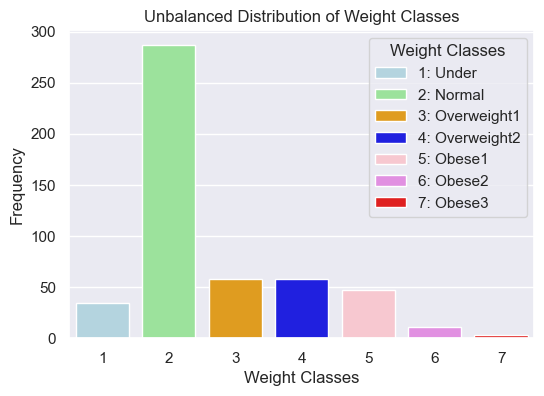

In [13]:
colpat1 = ['lightblue', 'lightgreen', 'orange', 'blue', 'pink', 'violet', 'red']
plt.figure(figsize=(6,4))  
sns.countplot(x='obese', data=df, palette=colpat1)
plt.title("Unbalanced Distribution of Weight Classes")
plt.xlabel("Weight Classes")
plt.ylabel("Frequency")
plt.legend(title="Weight Classes", labels=["1: Under", "2: Normal", "3: Overweight1", "4: Overweight2", "5: Obese1", "6: Obese2", "7: Obese3"])
plt.show()

# <span style="color:violet">**Synthetic Minority Oversampling (SMOTE)**</span>

In [14]:
# Separate depend & indep vars
X_ub=df.drop('obese',axis=1)
X_ub=pd.DataFrame(X_ub)
y_ub=df['obese']
X_ub=X_ub.apply(pd.to_numeric, errors='coerce')
y_ub=pd.to_numeric(y_ub, errors='coerce')

# SMOTE
ss={
    1: 34*3,
    2: 287,
    3: 58*3,
    4: 58*3,
    5: 47*3,
    6: 11*3,
    7: 3*3
}
smote=SMOTE(sampling_strategy=ss, random_state=666, k_neighbors=2)
xbal, ybal = smote.fit_resample(X_ub,y_ub)

# Create df with new observations
db=pd.DataFrame(xbal, columns=X_ub.columns)
db['obese']=ybal
db.to_csv('obesity.bal.csv', index=False)

# <span style="color:violet">**Exploratory Data Analysis II**</span>

In [15]:
ds=pd.read_csv("obesity.bal.csv")

In [16]:
ds.head()

,gend,age,height,weight,famhist,calH,veg,meals,snacks,smoke,water,calM,phys,tech,alc,trans,obese
0,1,21,1.62,64.0,1,0,1,3,1,0,2,0,0,1,0,4,2
1,1,21,1.52,56.0,1,0,2,3,1,1,3,1,3,0,1,4,2
2,0,23,1.80,77.0,1,0,1,3,1,0,2,0,2,1,2,4,2
3,0,27,1.80,87.0,0,0,2,3,1,0,2,0,2,0,2,5,3
4,0,22,1.78,89.8,0,0,1,1,1,0,2,0,0,0,1,4,4


In [17]:
len(ds)

920

C:\Users\savig\AppData\Local\Temp\ipykernel_11028\975063566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='obese', data=ds, palette=colpat2)


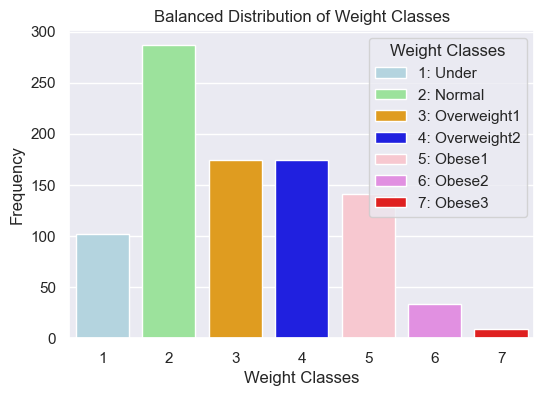

In [18]:
colpat2 = ['lightblue', 'lightgreen', 'orange', 'blue', 'pink', 'violet', 'red']
plt.figure(figsize=(6,4))  
sns.countplot(x='obese', data=ds, palette=colpat2)
plt.title("Balanced Distribution of Weight Classes")
plt.xlabel("Weight Classes")
plt.ylabel("Frequency")
plt.legend(title="Weight Classes", labels=["1: Under", "2: Normal", "3: Overweight1", "4: Overweight2", "5: Obese1", "6: Obese2", "7: Obese3"])
plt.show()

In [15]:
ds.describe()

,gend,age,height,weight,famhist,calH,veg,meals,snacks,smoke,water,calM,phys,tech,alc,trans,obese
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.350000,23.550000,1.691498,74.134737,0.556522,0.582609,1.206522,2.523913,1.293478,0.034783,1.840217,0.065217,0.955435,0.523913,0.659783,3.354348,3.108696
std,0.477229,6.918435,0.095866,18.840495,0.497065,0.493397,0.562484,0.909073,0.657062,0.183328,0.659337,0.247043,0.964649,0.675608,0.614047,1.271810,1.423849
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,19.000000,1.620000,60.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,0.000000,21.000000,1.698358,75.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,4.000000,3.000000
75%,1.000000,25.000000,1.760000,85.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,4.000000,4.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,7.000000


Note: Do not show entire table, but pick out key results (i.e. age, height, weight)

# <span style="color:violet">**Random Forests Analysis: Phase 1**</span>

# <span style="color:skyblue">**1. Preliminary/Data Prep**</span>

## <span style="color:orange">**Data Split 1: X, y Matrices**</span>

In [59]:
numvars=["age", "height", "weight"]
catvars=["gend", "famhist", "calH", "veg", "meals", "snacks", "smoke", "water", "calM", 
         "phys", "tech", "alc", "trans"]
ohe_catvars=pd.get_dummies(ds[catvars],drop_first=True)
X2=pd.concat([df[numvars],ohe_catvars],axis=1)
y=ds['obese']

## <span style="color:orange">**Data Split 2: Train/Test (80/20)**</span>

In [60]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2.fillna(0.), y, test_size=0.2, random_state=666)

## <span style="color:orange">**Feature Scaling**</span>

In [61]:
scale=StandardScaler()
Xtrain_sca=scale.fit_transform(Xtrain[numvars])
Xtest_sca=scale.transform(Xtest[numvars])

## <span style="color:orange">**Concatenation: OHE & Scaled**</span>

In [67]:
Xtrain_fin=pd.concat([pd.DataFrame(Xtrain_sca, columns=numvars).reset_index(drop=True), 
                        Xtrain[ohe_catvars.columns].reset_index(drop=True)], axis=1)
Xtest_fin=pd.concat([pd.DataFrame(Xtest_sca, columns=numvars).reset_index(drop=True), 
                       Xtest[ohe_catvars.columns].reset_index(drop=True)], axis=1)
ncols=Xtrain_fin.shape[1]
print(f"Number of columns in Xtrain_fin: {ncols}")
print("Column names in Xtrain_fin:")
print(Xtrain_fin.columns)
print(Xtest_fin.columns)
len(Xtrain_fin)
len(Xtest_fin)

Number of columns in Xtrain_fin: 16
Column names in Xtrain_fin:
Index(['age', 'height', 'weight', 'gend', 'famhist', 'calH', 'veg', 'meals',
       'snacks', 'smoke', 'water', 'calM', 'phys', 'tech', 'alc', 'trans'],
      dtype='object')
Index(['age', 'height', 'weight', 'gend', 'famhist', 'calH', 'veg', 'meals',
       'snacks', 'smoke', 'water', 'calM', 'phys', 'tech', 'alc', 'trans'],
      dtype='object')


184

# <span style="color:skyblue">**2. Model Building**</span>

## <span style="color:orange">**Hyperparameter Tuning**</span>

In [34]:
params=[{
    'n_estimators': [10,100,300,500,1000],
    'max_depth': [6,7,8,9,10,11,12,13,14,15]}]

ht=GridSearchCV(RandomForestClassifier(),
                           param_grid=params)
ht.fit(Xtrain_fin, ytrain)
print(ht.best_estimator_)

RandomForestClassifier(max_depth=13, n_estimators=1000)


## <span style="color:orange">**Model Fit [Tune for Model Evaluation]**</span>

In [63]:
mod=RandomForestClassifier(n_estimators=1000,
                           random_state=666,
                           max_depth=13,
                           max_features="sqrt" # of p; reduces test error
) 
mod.fit(Xtrain_fin, ytrain)
# mod.fit(X,y)

RandomForestClassifier(max_depth=13, n_estimators=1000, random_state=666)

# <span style="color:skyblue">**3. Model Evaluation**</span>

## <span style="color:orange">**Model Evaluation I: Accuracy & Score**</span>

In [64]:
# 2 methods for comparison
yhat=mod.predict(Xtest_fin)
init_acc=accuracy_score(ytest, yhat)
print(f"Accuracy: {init_acc:.4f}")
modacc=accuracy_score(ytest, yhat)
print("Accuracy:", modacc)
mod.score(Xtrain_fin, ytrain)
mod.score(Xtest_fin, ytest)

Accuracy: 0.7989
Accuracy: 0.7989130434782609


0.7989130434782609

Note: Improved accuracy based on hyperparameter tuning output compared to defaults.

## <span style="color:orange">**Model Evaluation II: Confusion Matrix**</span>

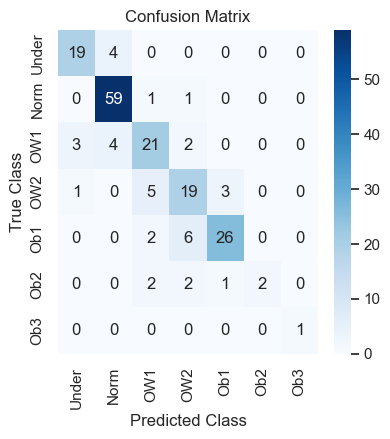

In [26]:
# 2 methods for comparison
cm=confusion_matrix(ytest, yhat)
# ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.figure(figsize=(4.2,4.2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Under', 'Norm', 'OW1', 'OW2', 'Ob1', 'Ob2', 'Ob3'], 
            yticklabels=['Under', 'Norm', 'OW1', 'OW2', 'Ob1', 'Ob2', 'Ob3'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## <span style="color:orange">**Model Evaluation III: Cross-Validation**</span>

In [28]:
cv=StratifiedKFold(n_splits=6, shuffle=True, random_state=666)
cvresult=cross_val_score(mod, Xtrain_fin, ytrain, cv=cv, scoring='accuracy')
print(f"CV Accuracy per K-fold: {cvresult}") 
print(f"Mean CV Accuracy: {cvresult.mean():.4f}")

CV Accuracy per K-fold: [0.72357724 0.71544715 0.78861789 0.71544715 0.67213115 0.66393443]
Mean CV Accuracy: 0.7132


Note: Results are consistent.  Good model fit, but not fantastic.

## <span style="color:orange">**Model Evaluation IV: Features**</span>

### <span style="color:orange">**_(i) Feature Importance_**</span>

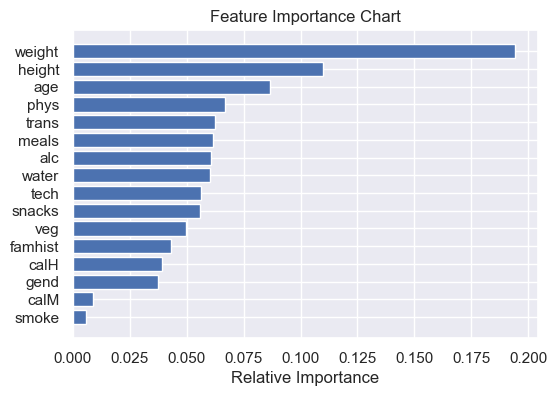

Total Relative Importance: 1.0000


In [43]:
# All features
Ximp=mod.feature_importances_
indices=np.argsort(Ximp)[::-1] 
plt.figure(figsize=(6,4))
plt.title("Feature Importance Chart")
plt.barh(range(len(indices)), Ximp[indices], align="center")
plt.yticks(range(len(indices)), [Xtrain_fin.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  
plt.show()
risum_all=np.sum(Ximp)
print(f"Total Relative Importance: {risum_all:.4f}")

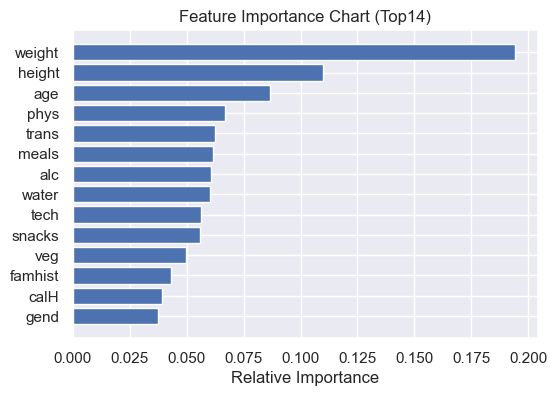

Total Relative Importance: 0.9852


In [44]:
# Top 14 --> Most Valuable
mvf_ind=indices[:14]
mvf=[Xtrain_fin.columns[i] for i in mvf_ind]
plt.figure(figsize=(6,4))
plt.title("Feature Importance Chart (Top14)")
plt.barh(range(14), Ximp[mvf_ind], align="center")
plt.yticks(range(14), mvf)
plt.xlabel("Relative Importance")
plt.gca().invert_yaxis()  
plt.show()
risum_mvf=np.sum(Ximp[mvf_ind])
print(f"Total Relative Importance: {risum_mvf:.4f}")

Note: Run reduced model update and evaluate.  Results in Phase 2 below suggest keep full model.

### <span style="color:orange">**_(ii) Permutation_**</span>

    Feature  Permutation Importance
2    weight                0.207428
15    trans                0.086957
12     phys                0.067029
7     meals                0.061141
4   famhist                0.060688
1    height                0.058877
5      calH                0.050725
14      alc                0.050725
3      gend                0.049819
10    water                0.048913
6       veg                0.043478
13     tech                0.023551
8    snacks                0.012228
9     smoke                0.005888
11     calM               -0.001359
0       age               -0.004982


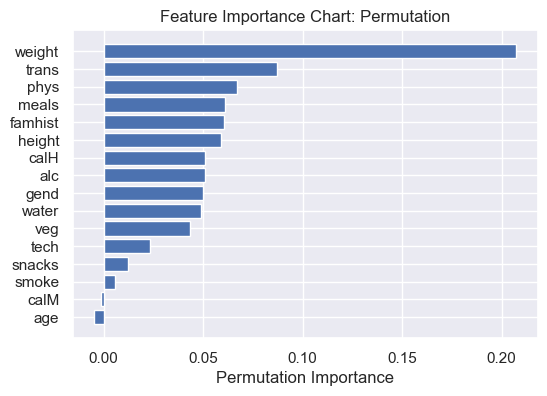

In [73]:
perm=permutation_importance(mod, Xtest_fin, ytest, n_repeats=12, 
                                random_state=666, n_jobs=-1)
perm_imp=perm.importances_mean
feats=Xtrain_fin.columns if hasattr(Xtrain_fin, 'columns') else [f'Feature {i+1}' for i in range(Xtrain_fin.shape[1])]
feats_imp=pd.DataFrame({
    'Feature': feats,
    'Permutation Importance': perm_imp
})
feats_imp=feats_imp.sort_values(by='Permutation Importance',ascending=False)
print(feats_imp)

plt.figure(figsize=(6,4))
plt.barh(feats_imp['Feature'], feats_imp['Permutation Importance'])
plt.title('Feature Importance Chart: Permutation')
plt.xlabel('Permutation Importance')
plt.gca().invert_yaxis()  
plt.show()

Note: Higher PI value indicates that shuffling values of feature decreases mod performance.
This suggests the feature is important.

### <span style="color:orange">**_(iii) SHAP Values_**</span>

In [72]:
shap_exp=shap.TreeExplainer(mod)
shap_vals=shap_exp(Xtest_fin)
for i in range(len(shap_vals)):
    print(f"Visualize SHAP Values for Class {i}")
    shap.summary_plot(shap_vals[i], Xtest_fin)

Visualize SHAP Values for Class 0


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

Note: Can't debug, may omit or ask prof

## <span style="color:orange">**Model Evaluation V: Classification Report (TBD)**</span>

In [112]:
print("Classification Report:")
print(classification_report(ytest, yhat))

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.65      0.71        23
           2       0.84      0.95      0.89        61
           3       0.58      0.63      0.60        30
           4       0.56      0.64      0.60        28
           5       0.88      0.68      0.77        34
           6       1.00      0.29      0.44         7
           7       0.33      1.00      0.50         1

    accuracy                           0.74       184
   macro avg       0.71      0.69      0.65       184
weighted avg       0.76      0.74      0.74       184



If a class in ytest has no predicted instances (i.e., the model never predicts that class), 
the precision for that class is undefined (since you can't divide by zero). 
The classification_report gives a warning when this happens.

# <span style="color:skyblue">**4. Model Visualization**</span>

## <span style="color:orange">**Model Visualization I: (Extract 1 Decision Tree)**</span>

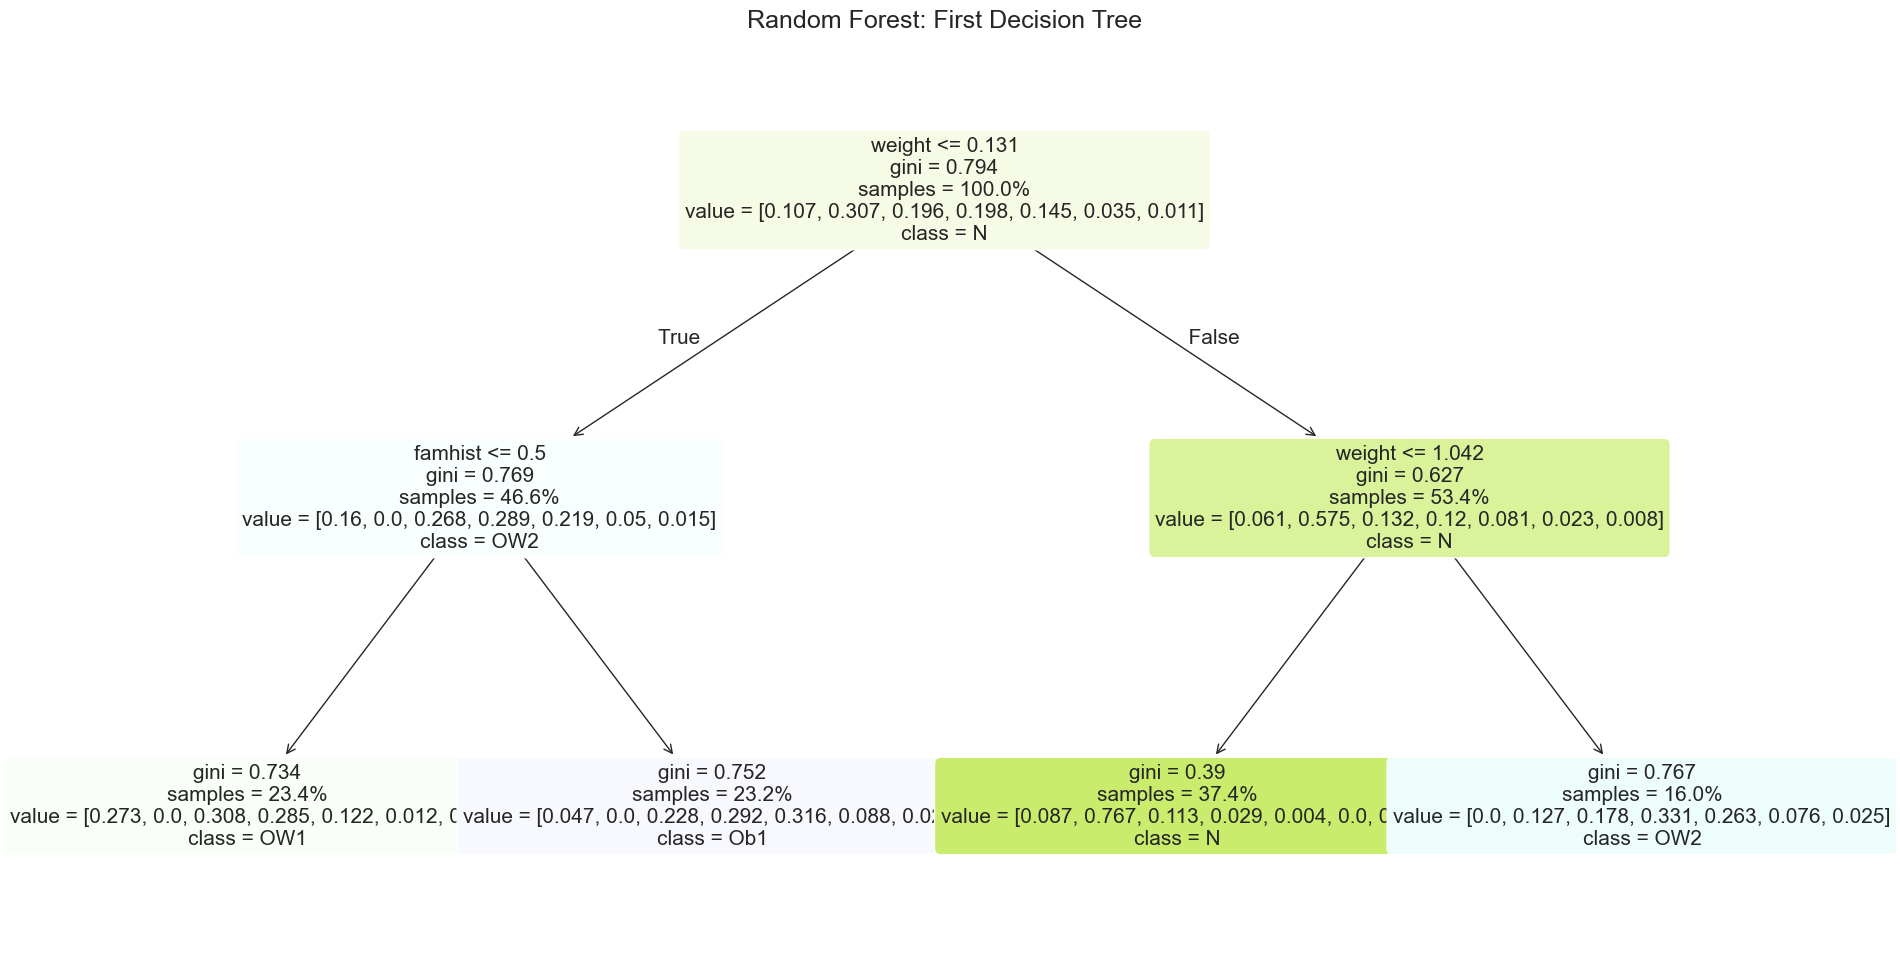

In [113]:
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(Xtrain_fin, ytrain)
plt.figure(figsize=(24,12))
plot_tree(dt,
          feature_names=Xtrain_fin.columns,
          class_names=['UW','N','OW1','OW2','Ob1','Ob2','Ob3'],
          filled=True,
          rounded=True,
          fontsize=15,
          proportion=True)
plt.title("Random Forest: First Decision Tree",fontsize=18)
plt.show()

# <span style="color:skyblue">**5. Predictions**</span>

## <span style="color:orange">**New Observation 1**</span>

In [38]:
new1=pd.DataFrame([[34, 1.55, 75, 0, 0, 0, 1, 2, 3, 1, 2, 1, 3, 2, 3, 1]], 
                    columns=['age', 'height', 'weight', 'gend', 'famhist', 'calH', 'veg', 'meals', 
                             'snacks', 'smoke', 'water', 'calM', 'phys', 'tech', 'alc', 'trans'])

new_ohe=pd.get_dummies(new1[catvars], drop_first=True)
new1_scaled=scale.transform(new1[numvars])
new1_final=pd.concat([pd.DataFrame(new1_scaled, columns=numvars), new_ohe], axis=1)
new1_final=new1_final[Xtrain_fin.columns]
prediction=mod.predict(new1_final)
obese_level = ["Under", "Normal", "OW1", "OW2", "Ob1", "Ob2", "Ob3"]
print(f"Predicted Obesity Class: {obese_level[prediction[0] - 1]}")

Predicted Obesity Class: OW1


# <span style="color:red">**Random Forests Analysis: Phase 2 (Reduced) - OMIT**</span>
The following evaluations show that the improvement was null/very minimal.
Use full model for prediction.

## <span style="color:orange">**Model Fit**</span>

In [42]:
Xtrain_mvf=Xtrain_fin[mvf]  
mod.fit(Xtrain_mvf, ytrain)
yhat_mvf=mod.predict(Xtest_fin[mvf])  

## <span style="color:orange">**Model Evaluation I: Accuracy**</span>

In [43]:
# 2 methods for comparison
acc_mvf=accuracy_score(ytest, yhat_mvf)
print(f"Accuracy: {acc_mvf:.4f}")
modacc_mvf=accuracy_score(ytest, yhat_mvf)
print("Accuracy:", modacc_mvf)

Accuracy: 0.7663
Accuracy: 0.7663043478260869


## <span style="color:orange">**Model Evaluation II: Confusion Matrix**</span>

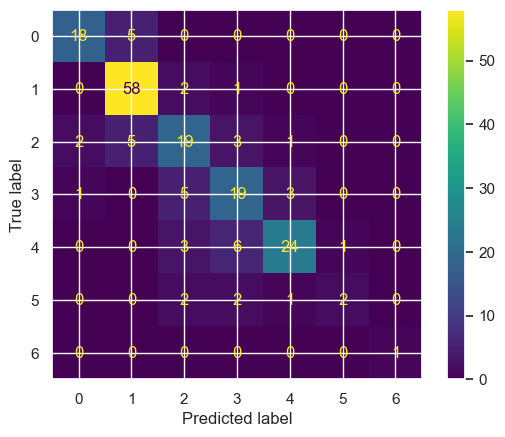

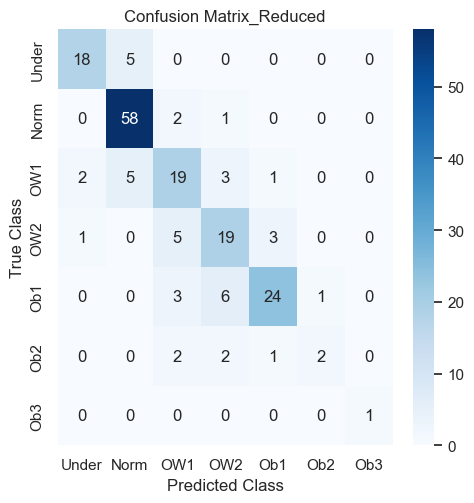

In [44]:
cm_mvf=confusion_matrix(ytest, yhat_mvf)
ConfusionMatrixDisplay(confusion_matrix=cm_mvf).plot()
plt.figure(figsize=(5.4,5.4))
sns.heatmap(cm_mvf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Under', 'Norm', 'OW1', 'OW2', 'Ob1', 'Ob2', 'Ob3'], 
            yticklabels=['Under', 'Norm', 'OW1', 'OW2', 'Ob1', 'Ob2', 'Ob3'])
plt.title("Confusion Matrix_Reduced")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

## <span style="color:orange">**Model Evaluation III: Cross-Validation**</span>

In [45]:
cv_mvf=StratifiedKFold(n_splits=6, shuffle=True, random_state=666)
cvresult_mvf=cross_val_score(mod, Xtrain_mvf, ytrain, cv=cv_mvf, scoring='accuracy')
print(f"CV Accuracy per K-fold: {cvresult_mvf}") 
print(f"Mean CV Accuracy: {cvresult_mvf.mean():.4f}")

CV Accuracy per K-fold: [0.71544715 0.70731707 0.74796748 0.70731707 0.66393443 0.63934426]
Mean CV Accuracy: 0.6969


## <span style="color:orange">**Model Evaluation V: Classification Report (TBD)**</span>

In [124]:
print("Classification Report:")
print(classification_report(ytest, yhat_mvf))

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.65      0.71        23
           2       0.87      0.95      0.91        61
           3       0.60      0.70      0.65        30
           4       0.61      0.68      0.64        28
           5       0.85      0.65      0.73        34
           6       0.67      0.29      0.40         7
           7       0.33      1.00      0.50         1

    accuracy                           0.75       184
   macro avg       0.67      0.70      0.65       184
weighted avg       0.76      0.75      0.75       184

